In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=tfk.datasets.fashion_mnist.load_data()

In [3]:
import pandas as pd
df=pd.DataFrame(dataset)

In [4]:
df.head(4)

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [5]:
(X_train,y_train),(X_test,y_test)=dataset

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
tf.random.set_seed=42
model=tfk.Sequential()
model.add(tfk.layers.Input(shape=[28,28]))
model.add(tfk.layers.Flatten())
model.add(tfk.layers.Dense(50,activation="relu"))

model.add(tfk.layers.Dense(90,activation="relu"))
model.add(tfk.layers.Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 90)                4590      
                                                                 
 dense_2 (Dense)             (None, 10)                910       
                                                                 
Total params: 44750 (174.80 KB)
Trainable params: 44750 (174.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.layers[1]

In [11]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


In [12]:
history=model.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8109 - accuracy: 0.7243 - val_loss: 0.5712 - val_accuracy: 0.7957
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5191 - accuracy: 0.8169 - val_loss: 0.5081 - val_accuracy: 0.8202
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4696 - accuracy: 0.8343 - val_loss: 0.4813 - val_accuracy: 0.8312
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8439 - val_loss: 0.4618 - val_accuracy: 0.8370
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4247 - accuracy: 0.8510 - val_loss: 0.4702 - val_accuracy: 0.8346
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4081 - accuracy: 0.8558 - val_loss: 0.4385 - val_accuracy: 0.8428
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3962 - accuracy: 0.8606 - val_loss: 0.4327 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt


In [14]:
history_df = pd.DataFrame(history.history)


In [15]:
history_df.head

<bound method NDFrame.head of        loss  accuracy  val_loss  val_accuracy
0  0.810898  0.724250  0.571248        0.7957
1  0.519116  0.816850  0.508125        0.8202
2  0.469639  0.834333  0.481290        0.8312
3  0.444017  0.843900  0.461772        0.8370
4  0.424712  0.851033  0.470204        0.8346
5  0.408146  0.855767  0.438531        0.8428
6  0.396162  0.860600  0.432749        0.8477
7  0.384928  0.863917  0.419722        0.8506
8  0.374732  0.868033  0.440407        0.8377
9  0.366373  0.869650  0.397090        0.8582>

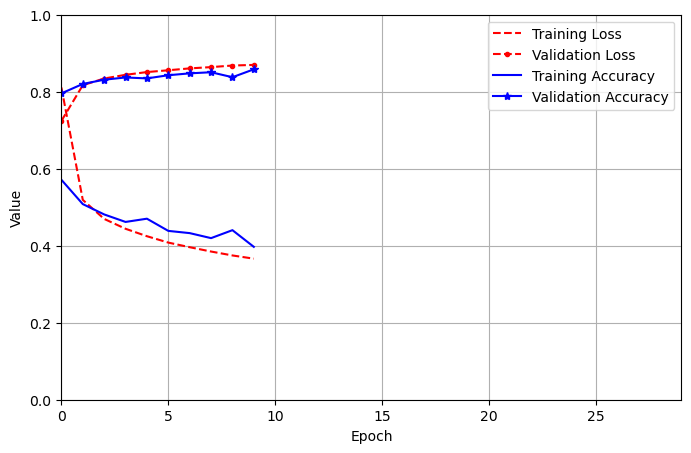

In [16]:
history_df.plot(figsize=(8, 5), grid=True, xlabel="Epoch", xlim=[0, 29], ylim=[0, 1], style=['r--', 'r--.', 'b-', 'b-*'])

# Add labels and legend
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend(["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy"])

plt.show()

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 857us/step - loss: 0.3971 - accuracy: 0.8582


[0.3970901370048523, 0.8582000136375427]

In [18]:
pred=model.predict(X_test[:5])

1/1 [==============================] - 0s 78ms/step


In [19]:
pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.14, 0.01, 0.77],
       [0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.18, 0.  , 0.26, 0.01, 0.03, 0.  , 0.51, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
model.save("../models/save_model/fashion_mnist.h5")
